### Definition 6.1

# $E(X) = \sum_{x \in \Omega}xm(x)$

___

### Theorem 6.1

- $X$ is a discrete random variable with sample space $\Omega$ and distribution function $m(x)$
- $\phi:\Omega \rightarrow R$ is a function

#### Then

# $E(\phi(X)) = \sum_{x\in\Omega}\phi(x)m(x)$

#### E.g. if $X$ is the roll of a die and $\phi(x) = x \% 2$ then $E(\phi(X)) = \frac{1}{6}(1\%2)+...+\frac{1}{6}(6\%2) = \frac{3}{6}(1) + \frac{3}{6}(0) = 1$

____
### Theorem 6.2

- Let $X$ and $Y$ be random variables with finite expected values
- Then:

# $E(X+Y) = E(X) + E(Y)$

___
## Bernoulli Trials

### Theorem 6.3

- Let $S_{n}$ be the number of successes in $n$ Bernoulli trials with parameter $p$

- Then:

# $E(S_{n}) = np$

____

## Poisson distribution

- Recall that the poisson distribution approximates a Binomial distribution with $n\rightarrow \infty$ and parameter $p$
    - $\lambda = np$, and since the Binomial distribution is simply a series of Bernoulli trials, the expected value of the Binomial distribution is simply $np$
    
### Therefore the expected value of a Poisson distribution is equal to $\lambda$

___

## Independence

- If $X$ and $Y$ are two random variables, it is **not** generally true that $E(X\cdot Y) = E(X)\cdot E(Y)$

- However, **if $X$ and $Y$ are independent**, then:

### Theorem 6.4

# $E(X\cdot Y) = E(X) \cdot E(Y)$

___

## Records

### How many record snow falls do we expect in $n$-years?

- E.g. in a 4 year period, it can snow [100, 120, 110, 130]
    - Since 100 was the first record we kept, 100 was the first record (n records so far = 1)
        - In year 2, it snowed 120 so that broke the previous record (n records so far = 2)
            - In year 3, it didn't snow as much as the previous year, therefore no new record (n records so far = 2)
                - In year 4, it snowed more than ever before (n records so far = 3)
                
- **So in this example, there were 3 records in a 4 year period**

### Let $X_{j}$ be a random variable representing whether a new record was set in year $j$

- Then, $X$ can take on two possible values: 1 or 0

#### In the first year, we don't have any previous records (so it must be a record) $\implies P(X_{1} = 1) = 1$

#### If we're considering a two year period, the year with the most snowfall between the two has a uniform distribution (i.e. either (Snowfall 1)>(Snowfall 2) or (Snowfall 2)>(Snowfall 1)) $\implies P(X_{2} = 1) = \frac{1}{2}$


#### Now, in a three year period, for $X_{3}$ to be equal to 1, we need the third snowfall to be the greatest of the three $\implies P(X_{3} = 1) = \frac{1}{3}$

### As we can see, to set a new record in year $j$, we need it to be the biggest snowfall yet which has probability $\frac{1}{j}$


### We can solve for the expected number of record snowfalls as $E(X_{1}+X_{2}+...+X_{n})$

- **What does this mean?**
    - Since the $X_{j}$ values are each either 0 or 1, we can take the sum of them to get the total number of records
    
### Recall: $E(X+Y) = E(X) + E(Y) \implies E(X_{1}+X_{2}+...+X_{n}) = E(X_{1})+E(X_{2}) + ... + E(X_{n})$

# $E(X_{1})+E(X_{2}) + ... + E(X_{n}) = 1 + \frac{1}{2} + \frac{1}{3} + ... + \frac{1}{n}$

### This is the famous Harmonic series $\implies 1 + \frac{1}{2} + \frac{1}{3} + ... + \frac{1}{n} \approx log(n)$

____

## Craps

- In a game of craps, the player makes some bet rolls a pair of dice
    - If the sum of the two dice is 7 or 11, the player wins
    - If the sum is 2, 3, or 12, the player loses
    - If the sum is any other number (call it $r$), then the player rolls until the next 7 or $r$
        - If a 7 comes up first, the player loses
        - If an $r$ comes up first, the player wins
        
        
- We define a function to simulate the outcome of $n$ games each with a bet of 1

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 10

In [41]:
def single_game():
    first_roll = np.sum(np.random.randint(1, 7, size = 2))
    if first_roll in [7, 11]:
        return 1
    elif first_roll in [2, 3, 12]:
        return -1
    else:
        while True:
            new_roll = np.sum(np.random.randint(1, 7, size = 2))
            if new_roll == first_roll:
                return 1
            elif new_roll == 7:
                return -1

In [4]:
def craps_game(n):
    results = []
    for i in range(n):
        results.append(single_game())
    return results

**Plotting winnings for a bunch of trials of 100 games**

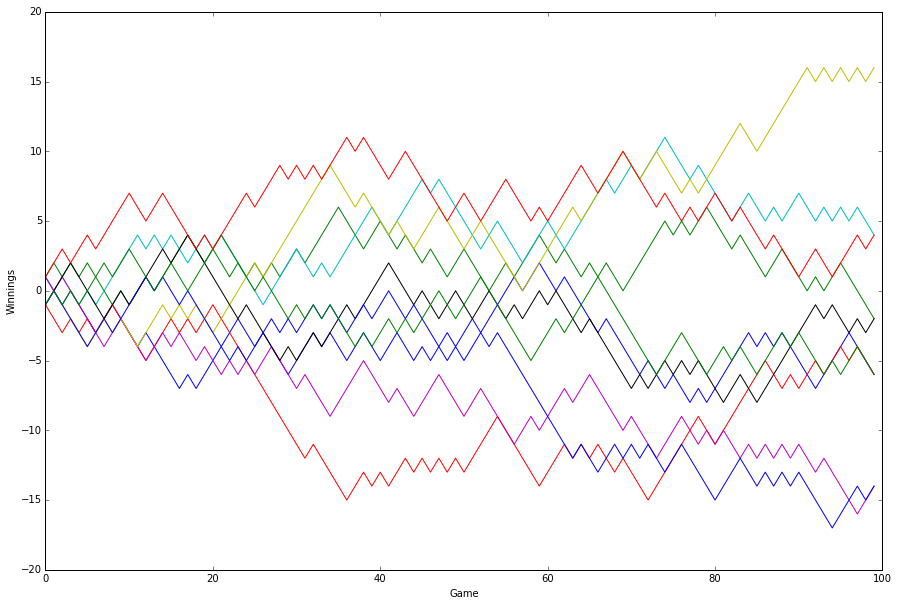

In [18]:
for i in range(10):
    x = range(100)
    y = np.cumsum(craps_game(100))
    plt.plot(x,y)
plt.xlabel('Game')
plt.ylabel('Winnings')
plt.show()

### If we run the `craps_game` function 10,000 times and take the mean of the winnings in each game, we get an approximation for the expected payoff of a single game

In [27]:
np.mean(craps_game(10000))

-0.0146

**So we expect a small loss**

### We can build a tree diagram to derive this expected amount, but fuck that

___

## Roulette

### On a roulette wheel, there are 38 values: 1-36, 0, and 00

### 18 are red, 18 are black, and the 0 and 00 are green

### If we bet on red and the ball lands on red, we win our bet (otherwise, we lose it)

### If we bet 1 dollar on red, what is our expected profit?

### Let $X$ be the random variable representing the payoff

### Then:

# $m(x) = \left\{\begin{matrix}\frac{18}{38} & \text{; if }x=1\\ \frac{20}{38} & \text{; if }x=-1\end{matrix}\right.$

### Therefore:

# $E(X) = (1)(\frac{18}{38}) + (-1)(\frac{20}{38}) = -\frac{1}{19}$

____

## Monte Carlo Roulette

### No 00 on the wheel

### If you bet on red and the wheel lands on 0, there are three possible outcomes:

1. You get 0.5 back and the house keeps 0.5
2. The bet of 1 gets put into "prison"
    - If the next spin lands on red, you get the "prison money" back but don't win anything
    - If the next spin lands on black or 0, you lose the "prison money"
3. Similar to 2, your bet goes into "prison"
    - If the next spin is red, you get it back
    - If the next spin is black, you lose it
    - If the next spin is 0, you go to "double prison"
        - If the next spin is red, it goes back to "regular prison"
        - If the next spin is black or 0, you lose it (i.e. no "triple prison")
        
### We can compare the winnings for the three games by simulation

___

## Conditional Expectation

### Definition 6.2

- $F$ is an event and $X$ is a random variable with sample space $\Omega = \left \{ x_{1}, x_{2}, ..., x_{n} \right \}$
    - Then, the *conditional expectation* of $X$ given $F$ is defined as:
    
# $E(X|F) = \sum_{i = 0}^{n}x_{i}\cdot P(X=x_{i}|F)$


### Theorem 6.5

- $X$ is a random variable with sample space $\Omega$
- $F_{1}$, $F_{2}$, ..., $F_{n}$ are mutually exclusive events and $\Omega = \left \{ F_{1}, F_{2}, ..., F_{n} \right \}$
- Then:

# $E(X) = \sum_{i=0}^{n}E(X|F_{i})\cdot P(F_{i})$

____

## Conditional Expectation and Craps

- Let $T$ be a random variable representing the number of rolls in a single game of craps
    - This is a two stage process (as seen in the `single_game` function)
        - *Stage 1:* first roll
        - *Stage 2:* further rolls
        
- Let $X$ be a random variable representing the score of the first roll
- Let $S$ represent the number of rolls in the second stage

### Then $T = 1 + S$

- Using Theorem 6.5, we get:

# $E(T) = \sum_{i = 2}^{12}E(T|X=i)\cdot P(X=i)$

### For $i = 2, 3, 7, 11, \text{ or } 12 \rightarrow E(T|X=i) = 1$ since the game ends after one roll

### Using the tree diagram for the game, we calculate $E(T) \approx 3.375$

#### Let's simulate this

In [42]:
def single_game_counter():
    first_roll = np.sum(np.random.randint(1, 7, size = 2))
    if first_roll in [2, 3, 7, 11, 12]:
        T = 1
        return 1
    else:
        S = 0
        while True:
            new_roll = np.sum(np.random.randint(1, 7, size = 2))
            S += 1
            if (new_roll == first_roll)|(new_roll == 7):
                T = S + 1
                return T

In [44]:
results = []
for i in range(10000):
    results.append(single_game_counter())
np.mean(results)

3.4098999999999999

**Pretty close**

___

## Martingales

**Motivating Example**

- If we're betting on coin flips, then our expected winnings after the **first** flip is zero
    - If we win the first flip (and have 1 dollar of winnings), our expected total winnings after the **second flip** is 1
        - ...
        
- We can see that if our cumulative winnings after $n$ coin flips is $T$, our expected cumulative winnings after $n+1$ coin flips is also $T$
    - This essentially means the game is **fair**
    
**What is a Martingale?**

- Any game that is **fair** like the game described above

- It is possible to come up with elaborate gaming strategies to turn casino games (biased towards the house) into martingales
    - E.g. martingale doubling system, Labouchere system